In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import time
plt.style.use('ggplot')
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

# Read data

In [56]:
order=pd.read_csv('/Users/didi/Downloads/orders.csv')
order.head()

,created_at,id_order,customer_id,merchant_id,merchant_category,payment_type,status,total_amount,canceled_amount,captured_amount,refunded_amount,paid_amount
0,2020-12-01 00:00:03,ab9676f0-0008-4b93-9e7b-edbff2766485,617f2620-7892-435c-a7da-615dbf5dfe12,dfd4c10a-3367-46a6-b763-6f3ae80f20b8,Entertainment,PAY_BY_INSTALMENTS,expired,1701.3339,0.0,0.0,0.0,0.0
1,2020-12-01 00:00:12,461dff8f-e6c9-498e-803d-5521ba962bd6,f00d8884-83c0-4e89-9af9-9835ce800b91,31f2f0e4-64d6-4924-a4ef-e1c5a5fc73c4,Pets,PAY_BY_INSTALMENTS,expired,344.2700,0.0,0.0,0.0,0.0
2,2020-12-01 00:00:15,d9f676c3-5d99-4abe-94f0-fb25800ba022,4547fc95-4a8a-433d-85de-aa2a69e7f8aa,dfd4c10a-3367-46a6-b763-6f3ae80f20b8,Entertainment,PAY_BY_INSTALMENTS,expired,1092.5469,0.0,0.0,0.0,0.0
3,2020-12-01 00:00:25,1aee78e7-a794-4151-a1f9-35d7505c22c5,78f4a7eb-aac3-459e-830d-69f82b2af2b1,dfd4c10a-3367-46a6-b763-6f3ae80f20b8,Entertainment,PAY_BY_INSTALMENTS,declined,419.0752,0.0,0.0,0.0,0.0
4,2020-12-01 00:00:26,a5a8a473-bb43-4dac-b881-4a944bb6bf49,4378ab3c-97f9-41e5-8631-b7f1f6dffdcc,d1dd20c5-a977-4d59-92bf-cf98fd38e192,Pets,PAY_BY_LATER,declined,616.7450,0.0,0.0,0.0,0.0


In [57]:
event=pd.read_csv('/Users/didi/Downloads/order_events.csv')
event.head()

,id,event_id,order_id,event_name,payload,created_at
0,523307,cca17a50-4eda-443d-bfef-4956aea16a00,e4342982-9d4e-4b41-a673-c8ff488df622,Tamara\Component\Order\Model\Event\OrderWasDec...,"{""to"": ""declined"", ""from"": ""new"", ""order_id"": ...",2020-09-23 13:20:42
1,3132240,7ea10ed8-0dd2-4a66-a9b2-d92d1932baf6,1aee78e7-a794-4151-a1f9-35d7505c22c5,Tamara\Component\Order\Model\Event\OrderWasDec...,"{""to"": ""declined"", ""from"": ""new"", ""order_id"": ...",2020-12-01 00:00:26
2,3132252,6e3f30e8-42bb-48a7-a4ca-41288e2d93dd,59dc3853-5bd7-44d7-a9c4-6518c4364f38,Tamara\Component\Order\Model\Event\OrderWasDec...,"{""to"": ""declined"", ""from"": ""new"", ""order_id"": ...",2020-12-01 00:00:31
3,3132278,4ef45052-226c-47ca-901d-567ca34384c8,a5a8a473-bb43-4dac-b881-4a944bb6bf49,Tamara\Component\Order\Model\Event\OrderWasDec...,"{""to"": ""declined"", ""from"": ""new"", ""order_id"": ...",2020-12-01 00:00:48
4,3132521,95e41b14-fd3a-437a-a978-07235f5c548a,5346eade-47c6-474f-8bc2-a5f8b3e54be5,Tamara\Component\Order\Model\Event\OrderWasDec...,"{""to"": ""declined"", ""from"": ""new"", ""order_id"": ...",2020-12-01 00:03:27


In [58]:
pay=pd.read_csv('/Users/didi/Downloads/payments.csv')
pay.head()

,id_payment,payment_type,order_id,customer_id,merchant_id,status,total_amount,refunded_amount,paid_amount,pending_paid_amount,issued_refund_amount,refund_shipping_fee_amount,late_fee_amount,due_date,paid_date,last_late_fee_recorded_at,created_at,updated_at
0,3aa8a70c-094f-47ea-8565-bedfe110de12,1,408aaf00-020c-40c3-9442-c25dad818cab,96092838-726b-49d1-a732-e8061a61cfca,dfd4c10a-3367-46a6-b763-6f3ae80f20b8,refunded,278.5300,278.5300,0.0,0.0,0.0,0.0,0.0,2020-12-01 00:00:59,NaN,NaN,2020-12-01 00:00:59,2020-12-01 04:48:49
1,125b477f-e9b4-4024-b239-e380feea69c9,1,a6042519-84f7-405f-aa02-2c3dd5f8c9f5,1d0035b2-5767-47ba-b031-8733e1100cd3,9a672058-e4c3-450d-a969-883d9dd01576,refunded,65.0653,65.0653,0.0,0.0,0.0,0.0,0.0,2020-12-01 00:01:23,NaN,NaN,2020-12-01 00:01:23,2020-12-01 04:48:50
2,7d382b36-f542-4407-bd83-d579dc3b4f11,1,d3c90eca-b9c5-4066-9b27-cdf78c71ed6b,20eb3cb6-2bfd-40bb-81fd-ab9795201663,dfd4c10a-3367-46a6-b763-6f3ae80f20b8,refunded,154.5582,154.5582,0.0,0.0,0.0,0.0,0.0,2020-12-01 00:01:06,NaN,NaN,2020-12-01 00:01:06,2020-12-01 04:48:50
3,e435c958-3c76-4a73-b0e7-052352269811,1,6934d07b-b925-43a8-8c63-745d0f5e314b,1a0da936-27e8-4496-abb3-c44ab57ffb18,4d5d27f2-1e29-4de7-bef0-a3bde125d281,refunded,456.6162,456.6162,0.0,0.0,0.0,0.0,0.0,2020-12-01 00:01:20,NaN,NaN,2020-12-01 00:01:20,2020-12-01 04:48:50
4,a4943649-8a96-4b1c-9b43-bdaca6505244,1,b60319e4-8fb9-4210-8569-f32eb7fbb1d5,dd12cb95-64d4-4c41-a49a-0c5b5154526c,dfd4c10a-3367-46a6-b763-6f3ae80f20b8,refunded,264.2921,264.2921,0.0,0.0,0.0,0.0,0.0,2020-12-01 00:05:30,NaN,NaN,2020-12-01 00:05:30,2020-12-01 04:48:52


# Exploratory analysis

In [5]:
# check data size
order.shape

(979609, 12)

In [6]:
event.shape

(1212093, 6)

In [7]:
pay.shape

(655757, 18)

In [8]:
# check data type 
order.dtypes

created_at            object
id_order              object
customer_id           object
merchant_id           object
merchant_category     object
payment_type          object
status                object
total_amount         float64
canceled_amount      float64
captured_amount      float64
refunded_amount      float64
paid_amount          float64
dtype: object

In [9]:
event.dtypes

id             int64
event_id      object
order_id      object
event_name    object
payload       object
created_at    object
dtype: object

In [10]:
pay.dtypes

id_payment                     object
payment_type                    int64
order_id                       object
customer_id                    object
merchant_id                    object
status                         object
total_amount                  float64
refunded_amount               float64
paid_amount                   float64
pending_paid_amount           float64
issued_refund_amount          float64
refund_shipping_fee_amount    float64
late_fee_amount               float64
due_date                       object
paid_date                      object
last_late_fee_recorded_at      object
created_at                     object
updated_at                     object
dtype: object

In [64]:
# drop duplicates 
order=order.drop_duplicates()
event=event.drop_duplicates()
pay=pay.drop_duplicates()

In [12]:
# check unique values of order_id
order.id_order.nunique()

979609

In [13]:
event.order_id.nunique()

979463

In [14]:
pay.order_id.nunique()

280237

In [15]:
# check missing values
order.isnull().sum()

created_at                0
id_order                  0
customer_id          220628
merchant_id               0
merchant_category         0
payment_type              0
status                    0
total_amount              0
canceled_amount           0
captured_amount           0
refunded_amount           0
paid_amount               0
dtype: int64

In [16]:
event.isnull().sum()

id            0
event_id      0
order_id      0
event_name    0
payload       0
created_at    0
dtype: int64

In [17]:
pay.isnull().sum()

id_payment                         0
payment_type                       0
order_id                           0
customer_id                        0
merchant_id                        0
status                             0
total_amount                       0
refunded_amount                    0
paid_amount                        0
pending_paid_amount                0
issued_refund_amount               0
refund_shipping_fee_amount         0
late_fee_amount                    0
due_date                           0
paid_date                      78921
last_late_fee_recorded_at     619337
created_at                         0
updated_at                         0
dtype: int64

In [18]:
# check distribution 
order.groupby('status').size()

status
authorised               266
canceled                6958
declined              139302
expired               607588
fully_captured        217827
fully_refunded          3511
partially_captured       382
partially_refunded      3657
updated                  118
dtype: int64

In [19]:
event.groupby('event_name').size()

event_name
Tamara\Component\Order\Model\Event\OrderWasApproved      232610
Tamara\Component\Order\Model\Event\OrderWasAuthorised    232611
Tamara\Component\Order\Model\Event\OrderWasDeclined      139312
Tamara\Component\Order\Model\Event\OrderWasExpired       607560
dtype: int64

In [20]:
pay.groupby('status').size()

status
paid                564289
pending              12149
pending_refunded      2331
refunded             76988
dtype: int64

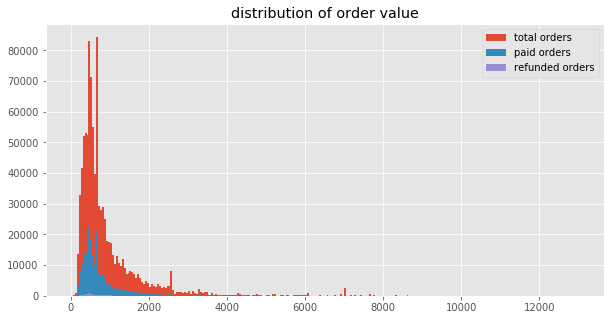

In [21]:
plt.figure(figsize=(10,5))
plt.hist(order.total_amount,bins=range(0, round(order.total_amount.max()) + 50, 50),label='total orders')
plt.hist(order[order.paid_amount>0].total_amount,bins=range(0, round(order.total_amount.max()) + 50, 50),
         label='paid orders')
plt.hist(order[order.refunded_amount>0].total_amount,bins=range(0, round(order.total_amount.max()) + 50, 50),
         label='refunded orders')
plt.title('distribution of order value')
plt.legend()
plt.show()

# Q1
**Assumptions:** 
* Deliquency rate is indicator of customer's side, refund is money paying back to customers. So refund with no paid actually made is not included in denominator, # of payments.    
(Because we don't know when the refund request is made by customers, we have no idea whether it is a late payment. So in that case, I just eliminate all the refunded orders with 0 paid amount. ) 
* Defination of paid late payments: after exploring the data, there are many payments with paid date later than due date, but no late fees generated. I believe late fee is not a good indicator for late payments. Whether a payment is late is decided by comparison between due date and paid date. Also payments only late for a few hours on the date as due date are not counted as late. 
* Defination of unpaid late payments: payments with zero paid amount. Payments with paid amount less than total amount after due date is also classified as unpaid late payments.

**Deliquency_rate is 13.43% and Recovery_rate is 83.55%**

In [59]:
pay['due_date_new']=pay['due_date'].apply(lambda x:x[:10])
pay['paid_date_new']=np.nan
pay['paid_date_new'][~pay.paid_date.isnull()]=pay['paid_date'][~pay.paid_date.isnull()].apply(lambda x:x[:10])

In [60]:
# calculate number of payments 
num_of_payments=pay[~((pay.status=='refunded')&(pay.paid_amount==0))].shape[0]
# number of refunded payments which is not included
refunded_with_no_pay= pay[(pay.status=='refunded')&(pay.paid_amount==0)].shape[0]
#number of payments into calculation= number of total payments - number of refunded payments which is not included
num_of_payments=pay.shape[0]-refunded_with_no_pay

In [61]:
# calculate number of unpaid late payments
temp=pay[~((pay.status=='refunded')&(pay.paid_amount==0))]
# number of unpaid late payments 
num_of_totally_unpaid=temp[(temp.paid_amount==0)].shape[0]
num_of_partially_unpaid=temp[(temp.paid_amount>0)&(temp.paid_amount<temp.total_amount)
                           &(temp.paid_date_new>temp.due_date_new)].shape[0]
number_of_unpaid_late=num_of_totally_unpaid+num_of_partially_unpaid

In [62]:
# calculate number of paid late payments
number_of_paid_late=temp[(temp.paid_amount>0)&(temp.paid_amount==temp.total_amount)
                           &(temp.paid_date_new>temp.due_date_new)].shape[0]

In [63]:
deliquency_rate=(number_of_paid_late+number_of_unpaid_late)/num_of_payments
recovery_rate=number_of_paid_late/(number_of_paid_late+number_of_unpaid_late)
print('Deliquency_rate is: {:.2%}' .format(deliquency_rate))
print('Recovery_rate is: : {:.2%}' .format(recovery_rate))

Deliquency_rate is: 13.43%
Recovery_rate is: : 83.55%


In [55]:
number_of_unpaid_late/num_of_payments

0.022106464188207168

# Q2
**Assumption:**
* I assume multiple attempts to same order means same customer, same merchant, same payment type, same product. Because we don't have product id in table, I assume same product means same merchant category and same order amount. A set of orders with same customer, same merchant, same payment type, same product, same amount is defined as one demand for convenience. 
* As long as the demand had at least one expiry, and was not successful eventually, the demand is counted. For example, demand with attempts like: expired, expired, canceled, will also be included even epxired is not its final status.   
* One demand can last for days. A customer who had expired order yesterday may try to buy the same product today or a few days later. So the gap in time between two attempts is not considered in this case.   

**There were 286992 unique orders/demands involved in expiry, and failed eventually.**  

In [27]:
# all the demands related to expiry
mm=order[order.status=='expired'][[
    'customer_id','merchant_id','merchant_category','payment_type','total_amount']].drop_duplicates()

# get the last status of each demand
last_status= pd.DataFrame(order.sort_values(by='created_at',ascending=True).groupby([
    'customer_id','merchant_id','merchant_category','payment_type','total_amount']).status.last())

# get the demand with last status as unsuccessfully 
last_status_unsuccess=last_status[last_status.status.isin(['expired', 'declined','canceled'])].reset_index()

In [28]:
expired_demands=pd.merge(last_status_unsuccess,mm, 
                         left_on=['customer_id','merchant_id','merchant_category','payment_type','total_amount'],
                        right_on=['customer_id','merchant_id','merchant_category','payment_type','total_amount'],
                        how='inner')

print('Number of unique orders/ demands due to expiry is: ',expired_demands.shape[0])

Number of unique orders/ demands due to expiry is:  286992


# Q3
**There were 210 orders related to wrong late fee issue**, amount of wrong late fees is 10974.  

All these orders are with fully capetured status.   
These orders shows higher percentage of entertainment category and higher proportion of making payments within 2 days ahead due compared to regular others.

In [29]:
# get due date rank and paid date rank of each order 
pay['due_date_unix']=pay['due_date'].apply(lambda x:int(time.mktime(time.strptime(x, "%Y-%m-%d %H:%M:%S"))))
pay['paid_date_unix']=pay.paid_date.fillna('3000-12-31 00:00:00')
pay['paid_date_unix']=pay['paid_date_unix'].apply(lambda x:int(time.mktime(time.strptime(x, "%Y-%m-%d %H:%M:%S"))))

mmm=pay[pay.payment_type==2]
mmm['due_rank']=mmm.groupby('order_id').due_date_unix.rank(method='first')
mmm['paid_rank']=mmm.groupby('order_id').paid_date_unix.rank(method='first')

In [31]:
# payments and due dates in different order, having late fee on first due
pay_due_reverse=mmm[(mmm.due_rank==1)&(mmm.late_fee_amount>0)&(mmm.paid_rank==2)]

# payments and due dates in different order, actually paid in first due 
first_install=mmm[(mmm.due_rank==2)&(mmm.paid_amount>0)&(mmm.paid_rank==1)]

# check whehter first payment is before first due
x=pd.merge(pay_due_reverse,first_install[['order_id','paid_date']]
           ,left_on='order_id',right_on='order_id',how='inner')

# orders with late fee 
accident_late_fee=list(x[x.paid_date_y<x.due_date].order_id)

order[order.id_order.isin(accident_late_fee)]

,created_at,id_order,customer_id,merchant_id,merchant_category,payment_type,status,total_amount,canceled_amount,captured_amount,refunded_amount,paid_amount
3498,2020-12-01 08:58:15,6966f7fe-fcdb-4c55-9e37-be54269a0daf,c326e51f-92c4-42ee-96f6-544f8f474a32,18a72c41-f4d9-4627-bb90-0c48fa7b7ba4,Entertainment,PAY_BY_INSTALMENTS,fully_captured,444.6100,0.0,444.6100,0.0,487.8600
4444,2020-12-01 13:02:28,bc1e33f3-9f97-45a2-8860-6cdccf790ee3,e1fc8e07-aebc-415e-84fc-ec1139aaa6ae,4d5d27f2-1e29-4de7-bef0-a3bde125d281,Gift Cards,PAY_BY_INSTALMENTS,fully_captured,235.3319,0.0,235.3319,0.0,278.5819
4750,2020-12-01 13:54:48,2f538c9b-83eb-4b04-a373-6dcd868b4d79,71f85be5-1313-4a39-b926-2af3d96c411e,4d5d27f2-1e29-4de7-bef0-a3bde125d281,Gift Cards,PAY_BY_INSTALMENTS,fully_captured,1670.1074,0.0,1670.1074,0.0,1713.3574
9309,2020-12-01 22:50:27,87dffb3c-b165-4f95-9a56-b54d89a48e6e,ee236342-d182-4465-94f5-365dea32cc9f,36e56a72-b450-4f96-8529-f2745fd8e218,Pets,PAY_BY_INSTALMENTS,fully_captured,510.3500,0.0,510.3500,0.0,596.8500
10218,2020-12-02 00:10:14,3994f17e-32ec-4f0e-b345-9a6bb3a24bec,2b69f8e8-379a-458a-8f0f-3d174da5c0ae,4d5d27f2-1e29-4de7-bef0-a3bde125d281,Gift Cards,PAY_BY_INSTALMENTS,fully_captured,537.4245,0.0,537.4245,0.0,580.6745
...,...,...,...,...,...,...,...,...,...,...,...,...
479277,2021-02-12 21:46:04,8bc2d9b9-e176-4af0-84b8-83f34fa8d681,5e5b7c60-603a-4a7b-a75b-7bbd2bd43dc3,17688580-2fd7-43f6-93a3-838c8e8952fb,Entertainment,PAY_BY_INSTALMENTS,fully_captured,593.3900,0.0,593.3900,0.0,636.6400
480398,2021-02-12 23:27:16,92b49456-f675-4ae2-9766-3e0618cd6fc9,e00efd39-2df0-4191-bb28-e71475bccb57,dfd4c10a-3367-46a6-b763-6f3ae80f20b8,Entertainment,PAY_BY_INSTALMENTS,fully_captured,445.9767,0.0,445.9767,0.0,489.2267
500092,2021-02-14 16:33:59,64eb13e2-19e3-47d8-8455-19bdffe9f59e,cec1dc9a-708b-4965-a341-5f2efb470517,8846d13f-b152-4ed2-8238-8ce19ba452db,Gift Cards,PAY_BY_INSTALMENTS,fully_captured,1674.6400,0.0,1674.6400,0.0,1116.4382
704502,2021-03-06 22:54:45,55babfed-b9de-4f84-adf2-30619f1b2333,8d86d3f2-07d6-4aef-bd3e-1d0b0316e978,f25fd872-fc46-4df2-9eab-c4c648ebc7de,Children Products,PAY_BY_INSTALMENTS,fully_captured,453.6060,0.0,453.6060,0.0,302.4040


 **Assumptions about causes of wrong late fee issue:** 
1. certain customers or merchants caused this problem  
2. this issue is related to order status
3. it is about the paid date or due date   

I will test above assumptions next.

### 1.Test customer and merchants assumption
210 orders with 76 merchants, and one of them has 41 orders(~20%)   
when I go deeper into these merchant, only 0.3% of its successful orders having this late fee issue.  
merchant is not the cause either.

In [32]:
# 210 orders with 208 customers, it seems customer is not the cause
len(order[order.id_order.isin(accident_late_fee)].customer_id.unique())

208

In [33]:
len(order[order.id_order.isin(accident_late_fee)].merchant_id.unique())

76

In [34]:
order[order.id_order.isin(accident_late_fee)].groupby('merchant_id').size().sort_values(ascending=False)

merchant_id
b48aa986-dc88-42a3-baf4-6881631ef8a9    41
dfd4c10a-3367-46a6-b763-6f3ae80f20b8    19
9a672058-e4c3-450d-a969-883d9dd01576     9
86aebfb4-7ef8-4a51-bfd9-fcfe8a9a8644     9
4d5d27f2-1e29-4de7-bef0-a3bde125d281     7
                                        ..
f67e10d8-3f31-4c7f-883c-5c881a14f037     1
81714b43-639b-417d-aedf-814d84780c49     1
717d5472-f0f4-44f3-b7cc-c71090f9d998     1
6d6092da-7933-48d4-918e-ec23448c6f26     1
0016c087-81f5-46bd-8076-938e3639f0b2     1
Length: 76, dtype: int64

In [35]:
order[order.merchant_id=='b48aa986-dc88-42a3-baf4-6881631ef8a9'].groupby('status').size()

status
canceled                 55
declined               2225
expired               43013
fully_captured        13781
partially_captured       14
partially_refunded       34
dtype: int64

In [36]:
41/(13781)

0.002975110659603802

Orders with wrong late fee issue has higher proportion of entertainment than normal orders (49% vs 41%)  
Further information is needed to identify whether it is one of the causes. 

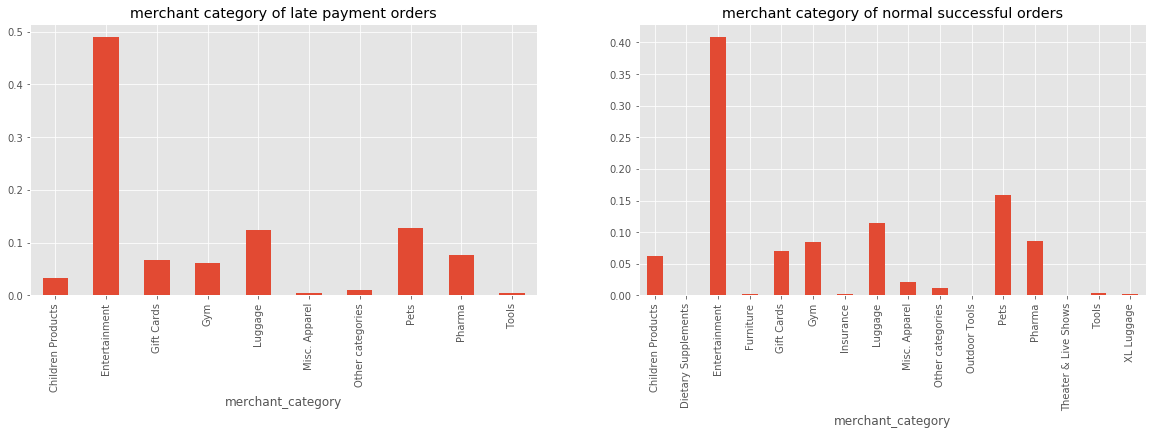

In [37]:
a=order[order.id_order.isin(accident_late_fee)].groupby('merchant_category').size()/order[
    order.id_order.isin(accident_late_fee)].shape[0]

b=order[(~order.id_order.isin(accident_late_fee))&(order.status.isin(['fully_captured', 
       'fully_refunded', 'partially_captured', 'partially_refunded']))].groupby('merchant_category').size()
b=b/order[(~order.id_order.isin(accident_late_fee))&(order.status.isin(['fully_captured', 
                                                                        'partially_captured']))].shape[0]


fig,(ax1,ax2)=plt.subplots(ncols=2,nrows=1,figsize=(20,5))
a.plot(ax=ax1,kind='bar',title='merchant category of late payment orders')
b.plot(ax=ax2,kind='bar',title='merchant category of normal successful orders')

### 2.Test order status assumption
all the orders are fully captured, so status is not related.

In [38]:
order[order.id_order.isin(accident_late_fee)].groupby('status').size()/order[
    order.id_order.isin(accident_late_fee)].shape[0]

status
fully_captured    1.0
dtype: float64

### 3.Test paid/ due date assumption

In [39]:
# payment history of late fee orders
test=x[x.paid_date_y<x.due_date]
test['paid_date_y_new']=test['paid_date_y'].apply(lambda x:x[:10])
test['due_dow']=pd.to_datetime(test.due_date_new).dt.dayofweek
test['paid_dow']=pd.to_datetime(test.paid_date_y_new).dt.dayofweek

# payment history of regular paid orders
test2=mmm[~mmm.order_id.isin(accident_late_fee)]
test2=test2[(test2.paid_amount>0)&(test2.payment_type==2)&(
    test2.due_date_new>=test2.paid_date_new)&(test2.due_rank==test2.paid_rank)]
test2['due_dow']=pd.to_datetime(test2.due_date_new).dt.dayofweek
test2['paid_dow']=pd.to_datetime(test2.paid_date_new).dt.dayofweek

test['gap']=pd.to_datetime(test.due_date_new)-pd.to_datetime(test.paid_date_y_new)
test2['gap']=pd.to_datetime(test2.due_date_new)-pd.to_datetime(test2.paid_date_new)

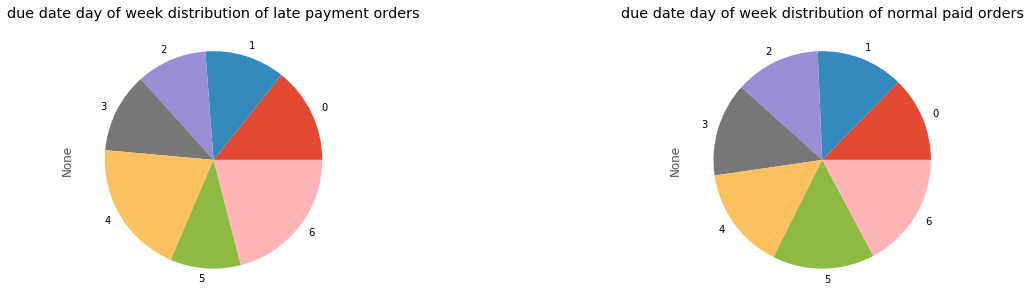

In [40]:
a=test.groupby('due_dow').size()/test.shape[0]
b=test2.groupby('due_dow').size()/test2.shape[0]
fig,(ax1,ax2)=plt.subplots(ncols=2,nrows=1,figsize=(20,5))
a.plot(ax=ax1,kind='pie',title='due date day of week distribution of late payment orders')
b.plot(ax=ax2,kind='pie',title='due date day of week distribution of normal paid orders')

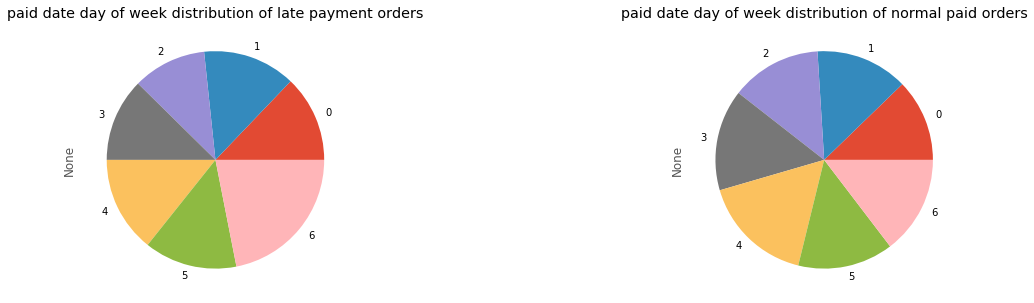

In [41]:
a=test.groupby('paid_dow').size()/test.shape[0]
b=test2.groupby('paid_dow').size()/test2.shape[0]
fig,(ax1,ax2)=plt.subplots(ncols=2,nrows=1,figsize=(20,5))
a.plot(ax=ax1,kind='pie',title='paid date day of week distribution of late payment orders')
b.plot(ax=ax2,kind='pie',title='paid date day of week distribution of normal paid orders')

Majority of the late fee payments (72%) are make within 2 days before due, while proportion of regular payments is only 53%.   
Especially 2 days ahead payment in late fee payments group is significantly higher (31% vs 17%).  
I believe how many days a payment is made ahead of due date is a factor which impacts happening of late fee payment issue.

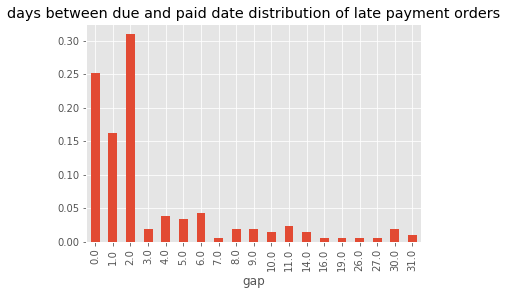

In [42]:
test['gap']=test['gap'].apply(lambda x:x/np.timedelta64(1, 'D'))
a=test.groupby('gap').size()/test.shape[0]
a.plot(kind='bar',title='days between due and paid date distribution of late payment orders')

In [43]:
b=test2.groupby('gap').size()/test2.shape[0]
b

gap
0 days      0.220361
1 days      0.117408
2 days      0.196144
3 days      0.050725
4 days      0.038965
              ...   
129 days    0.000004
131 days    0.000004
142 days    0.000004
144 days    0.000004
150 days    0.000004
Length: 99, dtype: float64

In [44]:
# amount of wrong late fees
test.late_fee_amount.sum()

10974.064699999999

# Q4
**There are 139306 orders being declined** (14% of total orders).      

**Top 4 declined codes account for 70% declined orders, which are 100012,100008,100000,100022.** 
1. Top 1 code is 10012 (account for 23% declined orders), meaning either Customer has pending dues on another tamara account or Customer shares device with multiple accounts.   
2. Top 2 code is 10008 (account for 22% declined orders), meaning Number is in the blacklist.  
3. Top 3 code is 10000 (account for 14% declined orders), meaning Item name and price is violated.  
4. Top 4 code is 10022 (account for 12% declined orders), meaning Poor credit score. 

In [45]:
# get order_id and events of declined orders
declined=list(order[order.status=='declined'].id_order.unique())
declined_event=event[event.order_id.isin(declined)]
print(declined_event.shape)
declined_event.head()

(139306, 6)


,id,event_id,order_id,event_name,payload,created_at
0,523307,cca17a50-4eda-443d-bfef-4956aea16a00,e4342982-9d4e-4b41-a673-c8ff488df622,Tamara\Component\Order\Model\Event\OrderWasDec...,"{""to"": ""declined"", ""from"": ""new"", ""order_id"": ...",2020-09-23 13:20:42
1,3132240,7ea10ed8-0dd2-4a66-a9b2-d92d1932baf6,1aee78e7-a794-4151-a1f9-35d7505c22c5,Tamara\Component\Order\Model\Event\OrderWasDec...,"{""to"": ""declined"", ""from"": ""new"", ""order_id"": ...",2020-12-01 00:00:26
2,3132252,6e3f30e8-42bb-48a7-a4ca-41288e2d93dd,59dc3853-5bd7-44d7-a9c4-6518c4364f38,Tamara\Component\Order\Model\Event\OrderWasDec...,"{""to"": ""declined"", ""from"": ""new"", ""order_id"": ...",2020-12-01 00:00:31
3,3132278,4ef45052-226c-47ca-901d-567ca34384c8,a5a8a473-bb43-4dac-b881-4a944bb6bf49,Tamara\Component\Order\Model\Event\OrderWasDec...,"{""to"": ""declined"", ""from"": ""new"", ""order_id"": ...",2020-12-01 00:00:48
4,3132521,95e41b14-fd3a-437a-a978-07235f5c548a,5346eade-47c6-474f-8bc2-a5f8b3e54be5,Tamara\Component\Order\Model\Event\OrderWasDec...,"{""to"": ""declined"", ""from"": ""new"", ""order_id"": ...",2020-12-01 00:03:27


In [46]:
139306/order.shape[0]

0.14220571677067076

In [47]:
# column payload has information about declined reason 
declined_event.payload[0]

'{"to": "declined", "from": "new", "order_id": "e4342982-9d4e-4b41-a673-c8ff488df622", "declined_code": "100007", "declined_reason": "User credit reached eligibility down payment threshold"}'

In [48]:
# extract declined code and reason  
declined_event['declined_code']=declined_event.payload.apply(lambda x: eval(x)['declined_code'] 
                                                             if 'declined_code' in eval(x).keys() else np.nan)
declined_event['declined_reason']=declined_event.payload.apply(lambda x: eval(x)['declined_reason']
                                                            if 'declined_reason' in eval(x).keys() else np.nan)

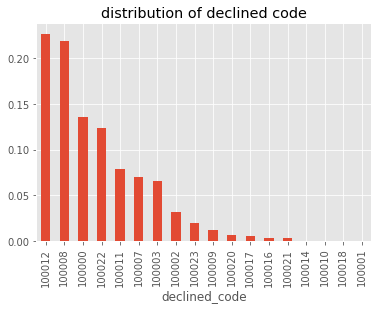

In [49]:
(declined_event.groupby('declined_code').size().sort_values(ascending=False)/139306).plot(kind='bar',
                                                                                title='distribution of declined code')

In [50]:
declined_event.groupby('declined_code').size().sort_values(ascending=False)/139306

declined_code
100012    0.226717
100008    0.218770
100000    0.135730
100022    0.123153
100011    0.078798
100007    0.069861
100003    0.065668
100002    0.031198
100023    0.019210
100009    0.012383
100020    0.006116
100017    0.005133
100016    0.003288
100021    0.003029
100014    0.000359
100010    0.000294
100018    0.000244
100001    0.000007
dtype: float64

In [51]:
declined_event[declined_event.declined_code=='100012'].groupby('declined_reason').size().sort_values(ascending=False)

declined_reason
Customer has pending dues on another tamara account with matching email, or phone numbers (store account, shipping or billing phone numbers)       24861
Customer 91f4f6e4-71fb-496f-a4df-41cd542fb8c1(phone = 966552995225) shared deviceId = W-6491497625554603a0a4db003a40a45e with multiple accounts       23
Customer d9cd867e-68db-4ac5-b03d-5ce5e3b5bb75(phone = 966567869750) shared deviceId = W-5192453aff664845af8a9588687fdd9f with multiple accounts       20
Customer fb726f09-de58-427b-b622-26965994ea23(phone = 966537509415) shared deviceId = W-4af577764fd9404483aa9a43f2296b45 with multiple accounts       17
Customer 1b9a6a15-2ce3-4618-a1a4-7628956537af(phone = 966557691334) shared deviceId = W-43b41ef70ad048bb8d17deafebc58622 with multiple accounts       16
                                                                                                                                                   ...  
Customer 9f9df2db-4e70-4b65-97ef-ed73297c9d2a(phone = 966563875391

# Q5
Insights and suggestions to company through analysis:  

* **From customer experience's point of view:**   
① During paying process :65% orders were unsuccessful ( 63% failed due to either declined or expired). The conversion rate from starting a payment to approved is only about 35%, which indicates not good customer experience.    
② After payment: wrong late payment fee issue is bad case for customer experience. With more investigation on the cause, I think this problem is solvable.   
**Company should invest on improving customer experience, especially reducing expiry rate and avoid after payment bad cases.** 
   
   
* **From financial point of view:**  
① From deliquency rate and recovery rate calculated above, we can estimate about 3% payments were unpaid. It is loss to company.    
② 3% sucessful orders required refunds, and it is also seen that many customers share accounts or have multiple accounts in previous analysis about declined orders. These activities could be frauds, and should be dealt with cautiously.   
**Company should pay attention to preventing bad debt and fraud.**

In [52]:
order[order.status.isin(['partially_refunded','fully_refunded','fully_captured','fully_refunded'])].shape[0]

224995

In [53]:
order[order.status.isin(['partially_refunded','fully_refunded'])&(order.total_amount>order.paid_amount)].shape[0]

6720

In [54]:
# refund rate 
6720/224995

0.02986733038511967